# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [2]:
import numpy as np

### Simulation du lancé de dé

In [3]:
def Roll():
    return int(np.random.choice(7,1))
#à travers la fonction int() on transforme l'array sous forme d'entier

In [4]:
Roll()

0

### Compléter le code et commenter

In [5]:
A=0#position
NA=0 #valeur de dé après chaque depart 
S=10 #la position de la cible 
temp=Roll() #Nous appelons la fonction roll() pour faire bouger le dé de sa position initiale jusqu'à ce qu'il atteigne sa cible
NA+=1
print(NA,temp)
while (temp !=6) :#on sort de la boucle while lorsqu'on avoir la valeur 6 à cet état le dé sort de son prison
    temp=Roll()
    NA+=1
    print(NA,temp)
A=1
print("sortie de la prison après {} coups".format(NA))
while(A<S):# on utilise la boucle while pour tester à chaque fois le nombre qu'on avoir aprés le lancement de dé 
    temp=Roll()
    if((temp+A<S)):
        NA+=1
        A+=temp;
        print(NA,temp,A)
    elif temp+A>S:
        NA+=1
        print(NA,temp,A)
    else:
        A=S
        NA+=1
        print(NA,temp,A)
        
    
    
    
    

1 2
2 5
3 5
4 1
5 2
6 5
7 1
8 2
9 1
10 1
11 0
12 1
13 1
14 6
sortie de la prison après 14 coups
15 0 1
16 3 4
17 4 8
18 6 8
19 1 9
20 5 9
21 4 9
22 6 9
23 2 9
24 4 9
25 4 9
26 3 9
27 1 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $S$ nécessaire pour atteindre la cible

In [13]:
def sim(S):
    #Le principe de fonction sim est de déterminer le nombre de coup nécessaire 
    #pour sortir du prison et atteindre la cible
    #pour un nombre S de pas pour atteindre la cible
    A=0#prison
    NA=0#compteur
    temp=Roll()
    NA+=1
    while (temp !=6) : 
        temp=Roll()
        NA+=1
    A=1
    while(A<S):
        temp=Roll()
        if((temp+A<S)):
        
            NA+=1
            A+=temp
        
        elif temp+A>S:
            NA+=1
        
        else:
            A=S
            NA+=1
    return NA
    
    

In [14]:
sim(10)

30

In [16]:
#simulation 10000 fois S=30
#on calcul la moyenne de coup qu'on peut avoir ,pour arriver à un cible de S pas pour un simulation de 10000
L=[sim(30) for i in range(10000)]
Moy=sum(L)/10000
print('estimation de la moyenne de X_30={}'.format(Moy))

estimation de la moyenne de X_30=22.2503


### Simulation de $10^5$  scénario 

In [26]:
x=list(range(10,20)) #x est un array de dimension 10 contient le nombre de pas aléatoire de rang(20)
x
y=[sum([sim(u) for i in range(10000)])/10000 for u in x] 
#y est un array de dimension 10 contient la moyenne de coup qu'on peut avoir pour chaque valeur de tableau x 

In [27]:
import matplotlib.pyplot as plt

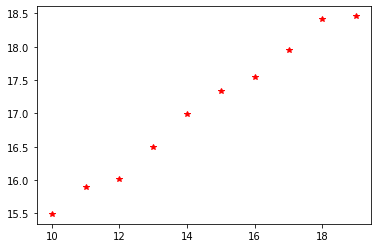

In [28]:
plt.plot(x,y,'*r')
plt.show()

In [29]:
#pip install scipy

In [30]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) 
#Calculer une régression linéaire des moindres carrés pour deux ensembles de mesures.

In [31]:
slope

0.34860606060606053

In [32]:
intercept


12.003472121212123

In [33]:
yy=[slope*u+intercept for u in x]

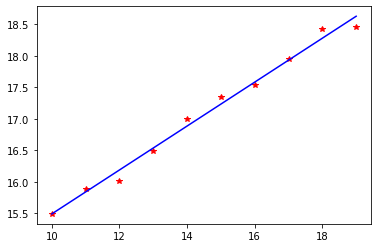

In [34]:
plt.plot(x,y,'*r',x,yy,'-b')

E(X_n)~=0.34860606*n+12.0034721